<a href="https://colab.research.google.com/github/kfukutom/cmplxsys335/blob/main/kfukutom_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Degree distribution for class network

1a)

In [52]:
# load and ensure the .csv and .txt file are properly read
from numpy import loadtxt, array
from csv import reader
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout

In [155]:
def readtxt(file):
    G = nx.DiGraph()

    with open(file, 'r') as f:
        for line in f:
            data = array(line.split(), dtype=int)
            i = data[0]
            for j in data[1:]:
                G.add_edge(i, j)

    return G


def readcsv(file):
    with open(file, 'r') as csvfile:
        r = reader(csvfile)
        ls = []

        for students in r:
            students[0] = int(students[0])
            ls.append(students)

    return ls


def conversion(G):
    return G.to_undirected()

# Arg: Graph input, then we'll call on it's respective feature .degree(index)
def sizing(G):
    degrees = [100 * G.degree(i) for i in G]
    return degrees

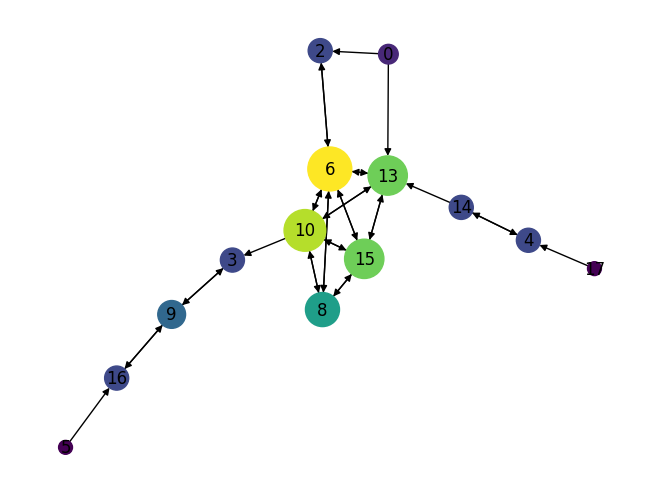

In [156]:
DiGraph = readtxt('classnet.txt')
lst = readcsv('classnames.csv')
sizes = sizing(DiGraph)
p = pydot_layout(DiGraph)
nx.draw(DiGraph, node_size=sizes, pos=p, with_labels=True, node_color=sizes)


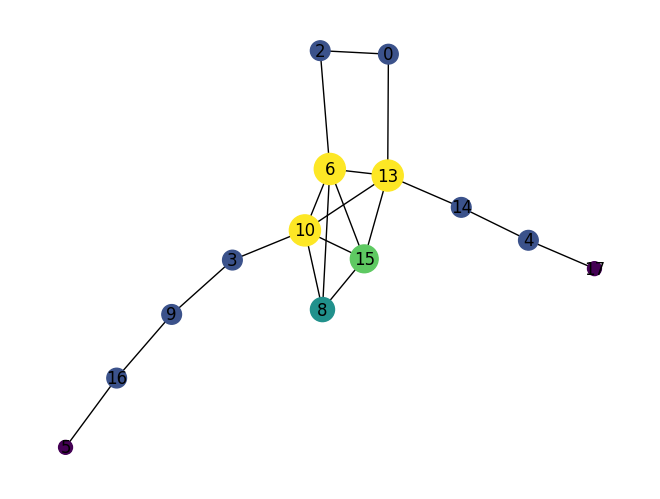

In [157]:
UndiGraph = conversion(DiGraph)
sizes = sizing(UndiGraph)
p = pydot_layout(UndiGraph)
nx.draw(UndiGraph, node_size=sizes, pos=p, with_labels=True, node_color=sizes)

1b)

We could assume that most people know around 1 to 3 people in the class.


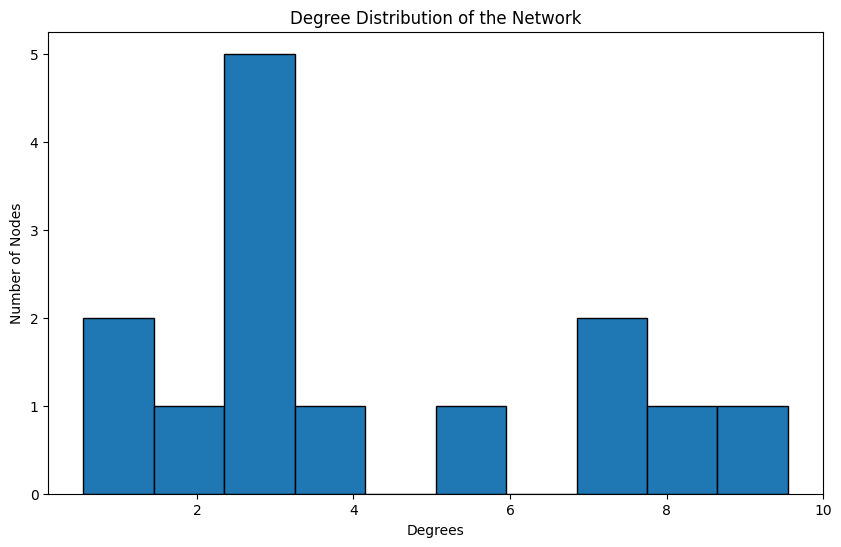

In [173]:
# start of 1b
from pylab import hist

degrees = [degree for node, degree in DiGraph.degree]
plt.figure(figsize=(10, 6))
hist(degrees, align='left', edgecolor='black')
plt.title('Degree Distribution of the Network')
plt.xlabel('Degrees')
plt.ylabel('Number of Nodes')
print('We could assume that most people know around 1 to 3 people in the class.')

1c)

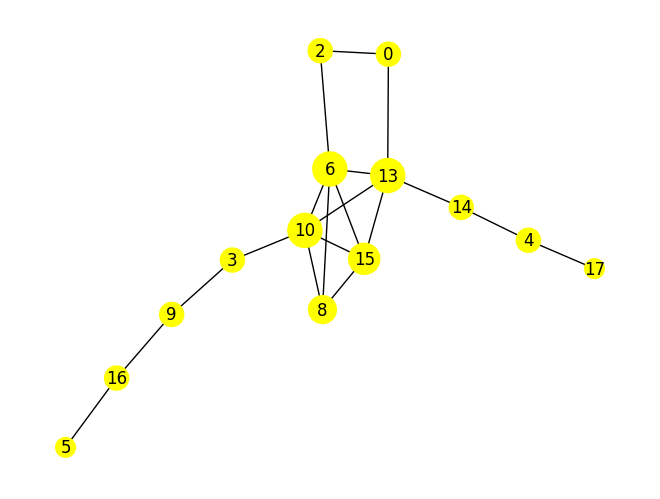

In [196]:
# Proportional to Degree Size + 1
def proportional(G):
  degrees = [degree for node, degree in G.degree()]
  sizes = [(degree + 1) * 100 for degree in degrees]
  p = pydot_layout(G)
  nx.draw(G, p, with_labels=True, node_size=sizes, node_color='yellow')

proportional(G)

1d)

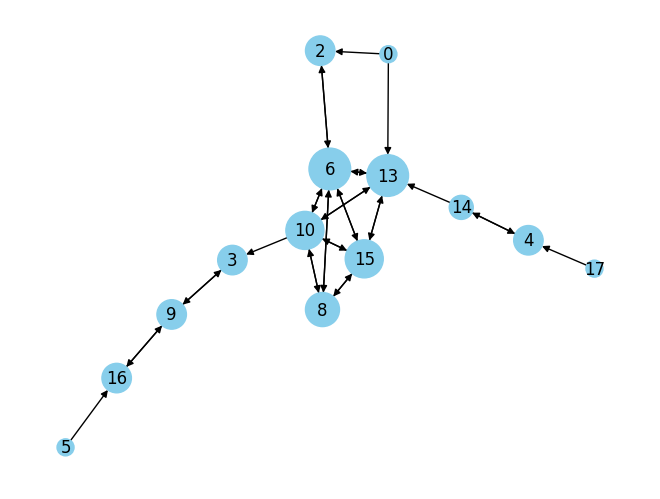

In [204]:
def inGraph(G):
  in_degrees = [G.in_degree(node) for node in G.nodes()]
  sizes = [(i + 1) * 150 for i in in_degrees]
  p = pydot_layout(G)
  nx.draw(G, p, with_labels=True, node_size=sizes, node_color='skyblue')

inGraph(DiGraph)

#2 Long-tailed distributions

#3 Centrality measures for class network

#4 Centrality measures for airline network

#5 Reciprocity